The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting.

In [66]:
import networkx as nx
import yaml
import xgi

from src import nx_yaml

def draw(stream):
    G = yaml.compose(stream, Loader=nx_yaml.NxSafeLoader)
    # G = nx.relabel_nodes(G, {n: d["value"] for n, d in G.nodes(data=True) if d["bipartite"] == 0})
    H = xgi.from_bipartite_graph(G)
    # nx.draw_networkx(G, pos=nx.bipartite_layout(G, {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}))
    xgi.draw(H)

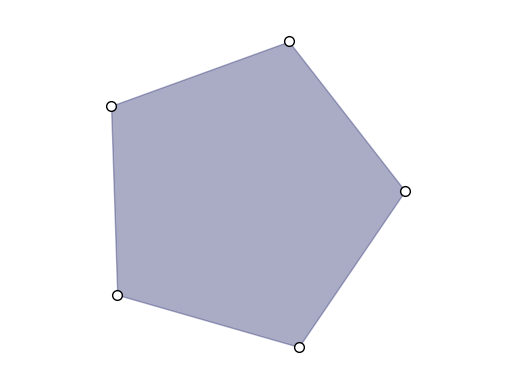

In [67]:
# in a set all elements are part of the same hyperedge
draw("{1, 2, 3, 4, 5}")

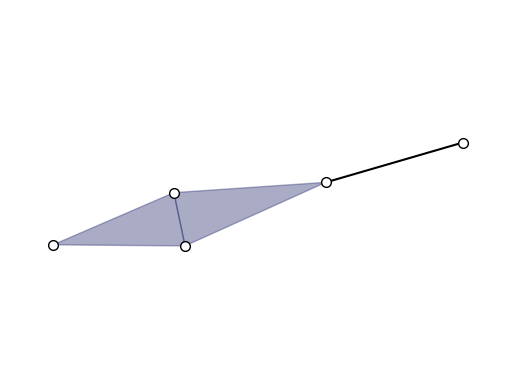

In [74]:
# lists have pairwise hyperedges
draw("[1, {2, 3}, 4, 5]")

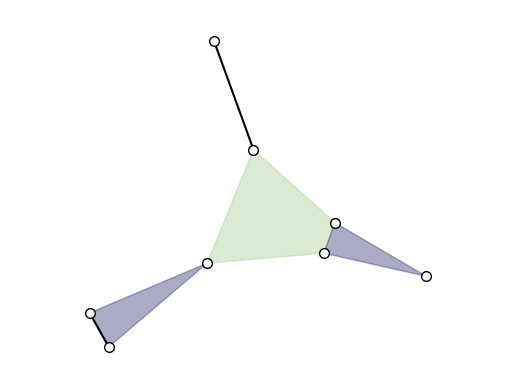

In [69]:
# maps combine all keys into one hyperedge
# and each key-value pair as well.
draw("""
1: 2
3: {4, 5}
{6, 7}: 8
""")

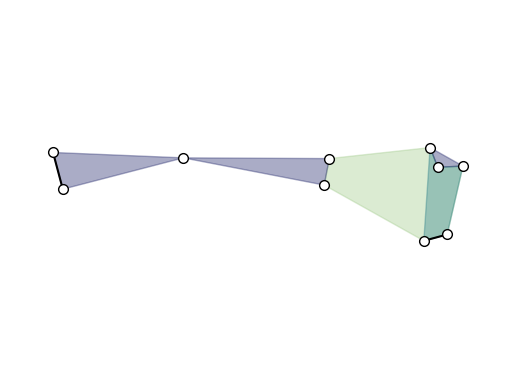

In [121]:
# nesting, lists, maps, sets
draw("""
- {1, 2}:
    ? {3, 4}
    ? {5, 6, 7}
- 8: {9, a}
""")

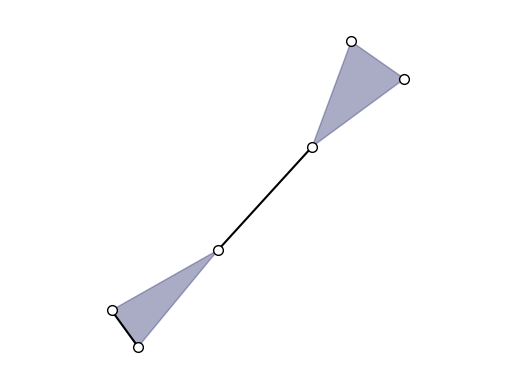

In [72]:
# https://xgi.readthedocs.io/en/latest/api/tutorials/recipes.html#8.-Plot-a-hypergraph-showing-one-order-only
# e.g H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
draw("[{1, 2}, 3, 4, {5, 6}]")